In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df14_15 = pd.read_csv('GDAX.BTC-USD_140101_150101.csv', sep=',')
df = df14_15
l = len(df)

df15_16 = pd.read_csv('GDAX.BTC-USD_150101_160101.csv', sep=',')
rename_dic = dict(zip(df15_16.index, [i + l for i in range(len(df15_16))]))
df15_16.rename(index=rename_dic, inplace=True)
df = df.append(df15_16)
l = len(df)

df16_17 = pd.read_csv('GDAX.BTC-USD_160101_170101.csv', sep=',')
rename_dic = dict(zip(df16_17.index, [i + l for i in range(len(df16_17))]))
df16_17.rename(index=rename_dic, inplace=True)
df = df.append(df16_17)
l = len(df)

df17_18 = pd.read_csv('GDAX.BTC-USD_170101_180101.csv', sep=',')
rename_dic = dict(zip(df17_18.index, [i + l for i in range(len(df17_18))]))
df17_18.rename(index=rename_dic, inplace=True)
df = df.append(df17_18)
l = len(df)

df18_19 = pd.read_csv('GDAX.BTC-USD_180101_190101.csv', sep=',')
rename_dic = dict(zip(df18_19.index, [i + l for i in range(len(df18_19))]))
df18_19.rename(index=rename_dic, inplace=True)
df = df.append(df18_19)
l = len(df)
print(l)

1951822


In [3]:
rename_dic = dict(zip(df.columns, 
                      ['ticks', 'per', 'date', 'time',
                       'open', 'high', 'low', 'close',
                       'vol']))
df.rename(columns=rename_dic, inplace=True)
df.columns

Index(['ticks', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'vol'], dtype='object')

In [134]:
k_defaults = 0.2
result = [500, 500/df.open[1000]]
maxloss = 0
curr = df.open[1000]
order = 100
b = 0 
k= [k_defaults, k_defaults]
all_j = [1000 for i in range(len(df.open))]
max_b = 0

In [135]:
for j in range(1001, len(df.open)):
    c = curr
    if (df.open[j]-c)/c > k[0]:
        k[1] = k_defaults
        k[0] *= 2
        if b <= 0:
            result[0]-=(b-1)*order
            result[1]+=(b-1)*order/df.open[j]*0.999
            b = 1
        elif b > 0:
            b *= 2
            result[0]+=b*order*0.999
            result[1]-=b*order/df.open[j]
        curr = df.open[j]
    elif (df.open[j]-c)/df.open[j] < -k[1]:
        k[0] = k_defaults
        k[1] *= 2
        if b >= 0:
            result[0]-=(b+1)*order
            result[1]+=b*order/df.open[j]*0.999
            b = -1
        elif b < 0:
            b *= 2
            result[0]+=b*order*0.999
            result[1]-=b*order/df.open[j]
        curr = df.open[j]
        
    m_u = result[0]
    m_b = result[1]*df.open[j]
    all_j[j] = m_u + m_b
    if m_u < maxloss:
        maxloss = m_u
    if m_b < maxloss:
        maxloss = m_b
        
    if max_b < math.fabs(b):
        max_b = math.fabs(b)
        
    if j %10000 == 0 or j == 10 or j == 100 or j == 1000:
        print("{} {} {}\t|{:.2f}\t+\t{:.2f}\t=\t{:.2f} {}".format(j//10000, b, maxloss, result[0],\
                                                                  result[1]*df.open[j], all_j[j],\
                                                                  str(df.date[j])+" "+str(df.time[j])))
        print("{} {} {}\t|{:.2f}\t+\t{:.2f}\t=\t{:.2f}".format(j//10000, b, maxloss, result[0]/df.open[j],\
                                                                  result[1], all_j[j]/df.open[j],\
                                                                  str(df.date[j])+" "+str(df.time[j])))

1 1 0	|600.00	+	464.49	=	1064.49 20150204 60900
1 1 0	|2.62	+	2.03	=	4.65
2 1 0	|600.00	+	447.94	=	1047.94 20150212 195700
2 1 0	|2.72	+	2.03	=	4.75
3 1 0	|600.00	+	491.34	=	1091.34 20150220 14300
3 1 0	|2.48	+	2.03	=	4.51
4 1 0	|600.00	+	511.87	=	1111.87 20150227 110400
4 1 0	|2.38	+	2.03	=	4.41
5 1 0	|600.00	+	553.56	=	1153.56 20150306 183500
5 1 0	|2.20	+	2.03	=	4.23
6 1 0	|600.00	+	582.60	=	1182.60 20150314 24700
6 1 0	|2.09	+	2.03	=	4.12
7 1 0	|600.00	+	523.74	=	1123.74 20150321 120600
7 1 0	|2.32	+	2.03	=	4.35
8 1 0	|600.00	+	515.01	=	1115.01 20150329 4900
8 1 0	|2.36	+	2.03	=	4.39
9 1 0	|600.00	+	522.64	=	1122.64 20150405 164900
9 1 0	|2.33	+	2.03	=	4.36
10 1 0	|600.00	+	482.79	=	1082.79 20150413 82500
10 1 0	|2.52	+	2.03	=	4.55
11 1 0	|600.00	+	455.10	=	1055.10 20150421 10600
11 1 0	|2.67	+	2.03	=	4.70
12 1 0	|600.00	+	454.27	=	1054.27 20150428 162800
12 1 0	|2.68	+	2.03	=	4.71
13 1 0	|600.00	+	476.71	=	1076.71 20150506 93100
13 1 0	|2.55	+	2.03	=	4.58
14 1 0	|600.00	+	481.41	=

108 1 0	|1099.00	+	871.18	=	1970.18 20170427 194500
108 1 0	|0.82	+	0.65	=	1.47
109 1 0	|1099.00	+	1050.37	=	2149.37 20170505 81000
109 1 0	|0.68	+	0.65	=	1.33
110 2 0	|1298.80	+	944.41	=	2243.21 20170512 82600
110 2 0	|0.74	+	0.54	=	1.27
111 2 0	|1298.80	+	1030.81	=	2329.61 20170519 71400
111 2 0	|0.67	+	0.54	=	1.21
112 2 0	|1298.80	+	1331.22	=	2630.02 20170526 60600
112 2 0	|0.52	+	0.54	=	1.06
113 2 0	|1298.80	+	1284.41	=	2583.21 20170602 44600
113 2 0	|0.54	+	0.54	=	1.08
114 2 0	|1298.80	+	1499.32	=	2798.12 20170609 32600
114 2 0	|0.46	+	0.54	=	1.00
115 2 0	|1298.80	+	1295.78	=	2594.58 20170616 20900
115 2 0	|0.54	+	0.54	=	1.07
116 2 0	|1298.80	+	1441.66	=	2740.46 20170623 12700
116 2 0	|0.48	+	0.54	=	1.02
117 2 0	|1298.80	+	1363.80	=	2662.60 20170630 20300
117 2 0	|0.51	+	0.54	=	1.05
118 1 0	|1198.80	+	3041.33	=	4240.13 20170710 84300
118 1 0	|0.48	+	1.21	=	1.69
119 -1 0	|998.80	+	2475.31	=	3474.11 20170717 73800
119 -1 0	|0.51	+	1.26	=	1.76
120 1 0	|1198.80	+	3256.65	=	4455.45 201

In [39]:
result

[-377039.36185563775, 183.45202279285988]

In [33]:
b

16.0

In [123]:
df.open[1000]

206.24

In [25]:
maxloss

-37730.2336

In [66]:
df.open.values[-1]

3724.04

In [110]:
c = ['orange', 'yellow', 'black', 'blue', 'green', 'gray', 'red', 'violet', 'tan', 'lime', 'darkblue', 'pink', 'aqua', 'gold', 'darkred']

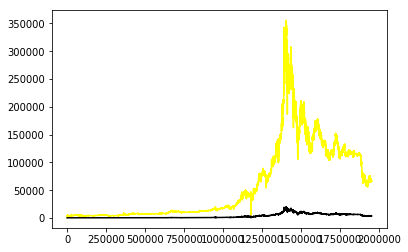

In [111]:
plt.plot(list(range(len(all_j))), all_j, color = c[1])
plt.plot(list(range(len(all_j))), df.open, color = c[2])

In [46]:
all_j[-1]

306143.30910588417

In [16]:
list(map(lambda a : a[-1], all_j))

[81878.83984756934,
 71663.71519489263,
 99051.4637211352,
 97070.58361291724,
 3561.0259899857283,
 48118.46501843797]